In [83]:
import pandas as pd
import datetime

In [84]:
url= "https://raw.githubusercontent.com/youyanggu/covid19_projections/master/infection_estimates/latest_all_estimates_states.csv"
url_usa = "https://raw.githubusercontent.com/youyanggu/covid19_projections/master/infection_estimates/latest_all_estimates_us.csv"

In [85]:
population_url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv'

In [86]:
df_states = pd.read_csv(url)
df_usa = pd.read_csv(url_usa)

In [87]:
# makes it easier to graph
df_states = df_states.fillna(0)
df_states['date'] = pd.to_datetime(df_states['date'], format="%Y-%m-%d")
df_usa = df_usa.fillna(0)
df_usa['date'] = pd.to_datetime(df_usa['date'], format="%Y-%m-%d")

In [88]:
date = df_usa['date'].iloc[-1]
cases = df_usa['daily_positive_7day_ma'].iloc[-1]
tests = df_usa['daily_tests_7day_ma'].iloc[-1]
adj_pos_rate = df_usa['positivity_rate_7day_ma'].iloc[-1]

print(f'The report today is from {date:%Y-%m-%d} and the 7d MA is {cases:,} on {tests:,} tests \
with an adjusted positivity rate of {adj_pos_rate:.2%} data: covid19-projections.com')

The report today is from 2020-12-27 and the 7d MA is 179,680.0 on 1,817,620.0 tests with an adjusted positivity rate of 9.89% data: covid19-projections.com


In [82]:
df_states.to_csv('infectionEstimates.csv', index=False)
df_usa.to_csv('infectionEstimates_usa.csv', index=False)

In [55]:
df_usa.tail(20)

,date,total_cases,total_deaths,total_tests,current_hospitalized,daily_positive_7day_ma,daily_deaths_7day_ma,daily_tests_7day_ma,positivity_rate_orig_7day_ma,positivity_rate_7day_ma,...,current_infected_upper,perc_current_infected_mean,perc_current_infected_lower,perc_current_infected_upper,total_infected_mean,total_infected_lower,total_infected_upper,perc_total_infected_mean,perc_total_infected_lower,perc_total_infected_upper
293,2020-12-01,13641607,262203,196979678,98777.0,161036.0,1524.86,1653170.0,0.101028,0.097411,...,13340100.0,0.026797,0.017865,0.040196,58675200.0,39116800.0,88012800.0,0.176799,0.117866,0.265198
294,2020-12-02,13842777,265007,198535645,100322.0,163041.0,1599.71,1612700.0,0.104805,0.101099,...,13531900.0,0.027183,0.018122,0.040774,59307400.0,39538300.0,88961100.0,0.178704,0.119136,0.268056
295,2020-12-03,14056416,267832,200429201,100755.0,175174.0,1805.14,1702250.0,0.106475,0.102907,...,13703100.0,0.027526,0.018351,0.041290,59938100.0,39958700.0,89907200.0,0.180604,0.120403,0.270906
296,2020-12-04,14285608,270405,202329587,101276.0,179747.0,1973.86,1685900.0,0.110515,0.106618,...,13849000.0,0.027820,0.018547,0.041730,60567800.0,40378500.0,90851700.0,0.182501,0.121668,0.273752
297,2020-12-05,14502286,272885,204539112,101192.0,189104.0,2149.43,1766300.0,0.111035,0.107062,...,13969700.0,0.028062,0.018708,0.042093,61199100.0,40799400.0,91798600.0,0.184404,0.122936,0.276605
298,2020-12-06,14683482,274030,206139403,101501.0,195525.0,2195.43,1813820.0,0.111844,0.107797,...,14062900.0,0.028249,0.018833,0.042374,61831100.0,41220700.0,92746600.0,0.186308,0.124205,0.279462
299,2020-12-07,14864420,275327,207857754,102148.0,200146.0,2232.86,1829150.0,0.113450,0.109420,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
300,2020-12-08,15079532,278030,209530230,104623.0,205418.0,2261.00,1872620.0,0.114571,0.109695,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
301,2020-12-09,15293715,281194,211341116,106705.0,207277.0,2312.43,1908280.0,0.113306,0.108620,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
302,2020-12-10,15512666,284309,213231180,107276.0,208036.0,2353.86,1907600.0,0.113752,0.109056,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Data Viz for USA

In [233]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [234]:
%matplotlib inline

In [240]:
# slicing the US data 
df_usa_viz = df_usa.iloc[20:-14,:]

<AxesSubplot:xlabel='rt_mean'>

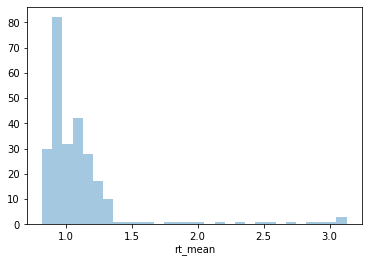

In [241]:
sns.distplot(df_usa_viz['rt_mean'], kde=False,bins=30)

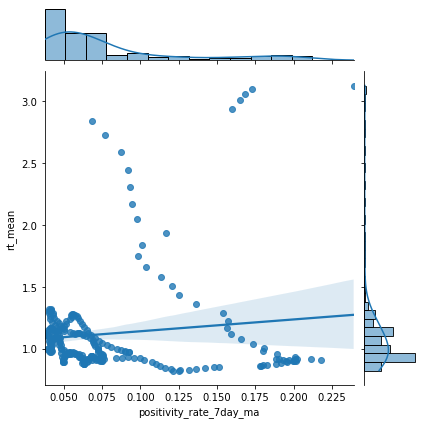

In [243]:
sns.jointplot(x='positivity_rate_7day_ma',y='rt_mean',data=df_usa_viz,kind='reg')

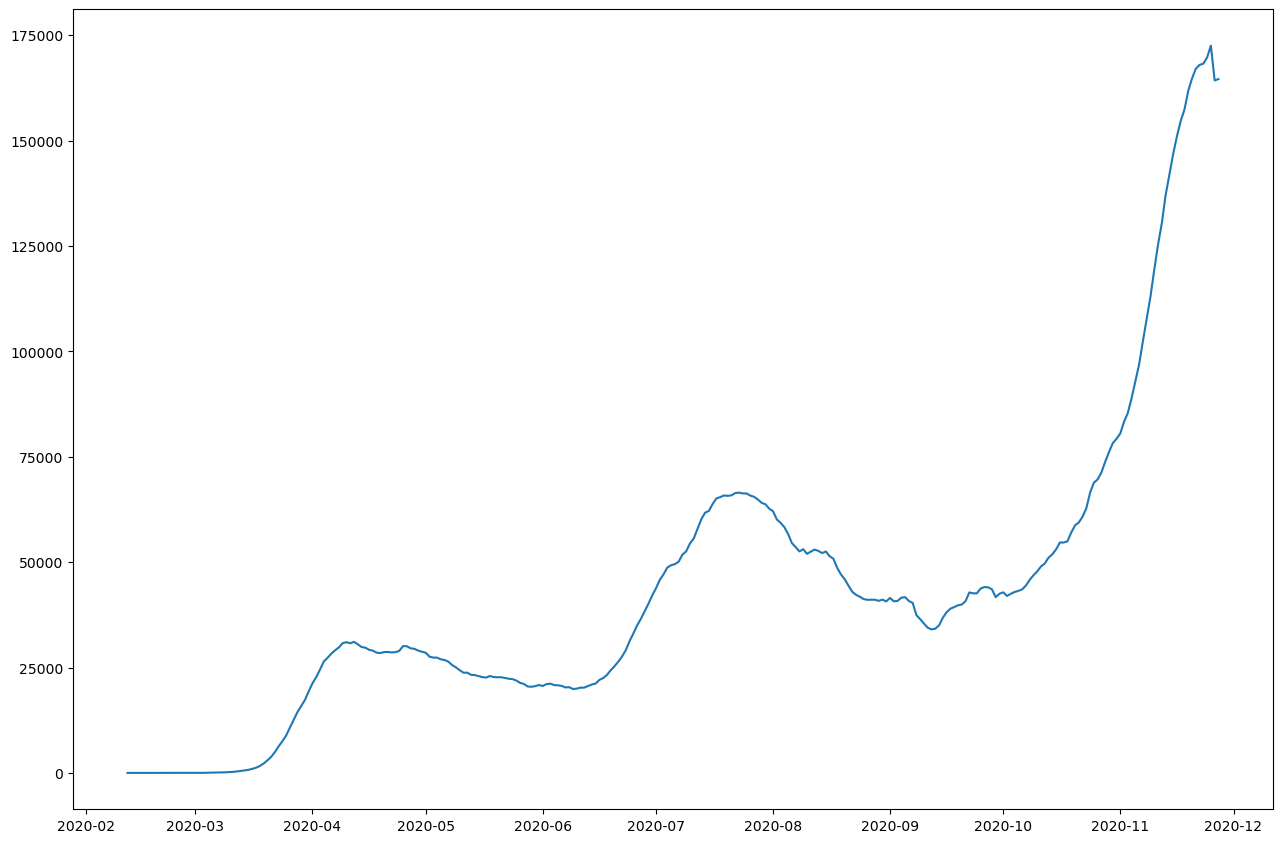

In [77]:
fig = plt.figure(figsize=(12,8),dpi=100)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df_usa['date'], df_usa['daily_positive_7day_ma'])

### Playground

In [79]:
ymax = max(df_usa['daily_positive_7day_ma'])

In [82]:
ymax = max(df_usa['daily_positive_7day_ma'])
xpos = df_usa['daily_positive_7day_ma'].index(ymax)
xmax = x[xpos]

TypeError: 'RangeIndex' object is not callable

In [90]:
x1 = df_usa.loc[df_usa['date'].values()
y1 = df_usa.loc[df_usa['daily_positive_7day_ma'].values()

SyntaxError: invalid syntax (<ipython-input-90-aa1bfdf929d4>, line 2)

In [92]:
x = df_usa['date'].to_numpy() 
y = df_usa['daily_positive_7day_ma'].to_numpy()

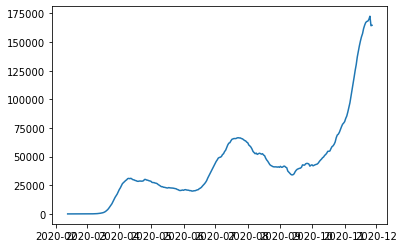

<Figure size 1200x800 with 0 Axes>

In [99]:
fig, ax = plt.subplots()
ax.plot(x,y)
fig = plt.figure(figsize=(12,8),dpi=100)

In [100]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:}, y={:}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)


ValueError: Image size of 21660276x37516908 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

### Clustering

In [126]:
df_states.head()

,date,state,total_cases,total_deaths,total_tests,daily_positive_7day_ma,daily_deaths_7day_ma,daily_tests_7day_ma,positivity_rate_orig_7day_ma,positivity_rate_7day_ma,...,current_infected_upper,perc_current_infected_mean,perc_current_infected_lower,perc_current_infected_upper,total_infected_mean,total_infected_lower,total_infected_upper,perc_total_infected_mean,perc_total_infected_lower,perc_total_infected_upper
0,2020-02-29,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,8.35714,0.000008,0.000005,0.000011,5.57143,3.71429,8.35714,0.000008,0.000005,0.000011
1,2020-03-01,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,23.25000,0.000021,0.000014,0.000032,15.50000,10.33330,23.25000,0.000021,0.000014,0.000032
2,2020-03-02,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,42.60710,0.000039,0.000026,0.000058,28.40480,18.93650,42.60710,0.000039,0.000026,0.000058
3,2020-03-03,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,65.75000,0.000060,0.000040,0.000090,43.83330,29.22220,65.75000,0.000060,0.000040,0.000090
4,2020-03-04,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,91.33570,0.000083,0.000055,0.000125,60.89050,40.59370,91.33570,0.000083,0.000055,0.000125


In [128]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [130]:
mask = (df['date'] > '2020-10-14') & (df['date'] <= '2020-11-14')

In [132]:
df_cluster_data = df.loc[mask]

In [133]:
scaler = StandardScaler()

In [136]:
df_cluster_data = df_cluster_data.drop('date',axis=1)

In [138]:
scaler.fit(df_cluster_data.drop('state',axis=1))

StandardScaler()

In [139]:
scaled_features = scaler.transform(df_cluster_data.drop('state',axis=1))

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['state'],
                                                    test_size=0.30)

ValueError: Found input variables with inconsistent numbers of samples: [1705, 15493]

### VAR modeling

In [178]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          293 non-null    datetime64[ns]
 1   total_cases                   293 non-null    int64         
 2   total_deaths                  293 non-null    int64         
 3   total_tests                   293 non-null    int64         
 4   daily_positive_7day_ma        293 non-null    float64       
 5   daily_deaths_7day_ma          293 non-null    float64       
 6   daily_tests_7day_ma           293 non-null    float64       
 7   positivity_rate_orig_7day_ma  293 non-null    float64       
 8   positivity_rate_7day_ma       293 non-null    float64       
 9   prevalence_ratio_mean         293 non-null    float64       
 10  prevalence_ratio_lower        293 non-null    float64       
 11  prevalence_ratio_upper        29

In [180]:
df_arima = df_usa.iloc[20:-14,:]
data = df_arima.drop(['date'], axis=1)
data = data[['rt_mean', 'new_infected_mean']]

In [181]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [182]:
from statsmodels.tsa.stattools import grangercausalitytests

In [183]:
granger_test = sm.tsa.stattools.grangercausalitytests(data, maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.3822 , p=0.0001  , df_denom=255, df_num=1
ssr based chi2 test:   chi2=15.5632 , p=0.0001  , df=1
likelihood ratio test: chi2=15.1118 , p=0.0001  , df=1
parameter F test:         F=15.3822 , p=0.0001  , df_denom=255, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9469  , p=0.0543  , df_denom=252, df_num=2
ssr based chi2 test:   chi2=6.0107  , p=0.0495  , df=2
likelihood ratio test: chi2=5.9414  , p=0.0513  , df=2
parameter F test:         F=2.9469  , p=0.0543  , df_denom=252, df_num=2


{1: ({'ssr_ftest': (15.382212594135586, 0.00011294287821391273, 255.0, 1),
   'ssr_chi2test': (15.563179801125417, 7.97934450275149e-05, 1),
   'lrtest': (15.111837875222363, 0.00010132590292752635, 1),
   'params_ftest': (15.382212613706786, 0.00011294287711101228, 255.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.9468574510087553, 0.05431660469447512, 252.0, 2),
   'ssr_chi2test': (6.010653689755954, 0.049522565486094475, 2),
   'lrtest': (5.941442880560771, 0.051266311405191334, 2),
   'params_ftest': (2.9468573946284273, 0.054316607686877544, 252.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [211]:
nobs = 4
df_train, df_test = data[0:-nobs], data[-nobs:]

In [212]:
df_train

,rt_mean,new_infected_mean
20,3.127760,20767.7
21,3.096700,25969.2
22,3.059010,32474.9
23,3.007410,40683.1
24,2.934910,49826.5
...,...,...
270,1.065210,564064.0
271,1.046320,563867.0
272,1.028450,562440.0
273,1.013020,559433.0


In [213]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

In [214]:
adf_test(df_train["rt_mean"])
adf_test(df_train["new_infected_mean"])

Test Statistic           -3.072021
p-value                   0.028694
# Lags                   16.000000
# Observations          238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283
dtype: float64
 Series is Stationary
Test Statistic           -1.505808
p-value                   0.530636
# Lags                   16.000000
# Observations          238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283
dtype: float64
 Series is Non-Stationary


In [215]:
# 1st difference
df_differenced = df_train.diff().dropna()
# stationarity test again with differenced data
adf_test(df_differenced["rt_mean"])

Test Statistic           -4.821307
p-value                   0.000050
# Lags                   16.000000
# Observations          237.000000
Critical Value (1%)      -3.458247
Critical Value (5%)      -2.873814
Critical Value (10%)     -2.573311
dtype: float64
 Series is Stationary


In [216]:
# model fitting
model = VAR(df_differenced)
results = model.fit(maxlags=15, ic='aic')
results.summary()

/Users/mikecave/anaconda3/envs/working/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Dec, 2020
Time:                     14:12:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.51364
Nobs:                     239.000    HQIC:                  -2.05206
Log likelihood:          -327.603    FPE:                  0.0895873
AIC:                     -2.41548    Det(Omega_mle):       0.0701964
--------------------------------------------------------------------
Results for equation rt_mean
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.000058         0.000041            1.420           0.155
L1.rt_mean                    2.222908         0.068672           32.370           0.000
L1.new_infected_mean      

In [217]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 14)

array([[ 9.46414710e-01,  5.50315299e+05],
       [ 8.92160670e-01,  5.55916530e+05],
       [ 8.05133451e-01,  5.60521782e+05],
       [ 6.81810293e-01,  5.51590879e+05],
       [ 5.12296792e-01,  5.37503858e+05],
       [ 3.21195634e-01,  5.24235805e+05],
       [ 1.15539384e-01,  5.04311264e+05],
       [-7.86300041e-02,  4.72219138e+05],
       [-2.46483685e-01,  4.41049903e+05],
       [-3.72031913e-01,  4.08756215e+05],
       [-4.47966848e-01,  3.87249017e+05],
       [-4.62053353e-01,  3.68581023e+05],
       [-4.38222268e-01,  3.48233924e+05],
       [-3.81915928e-01,  3.32751796e+05]])

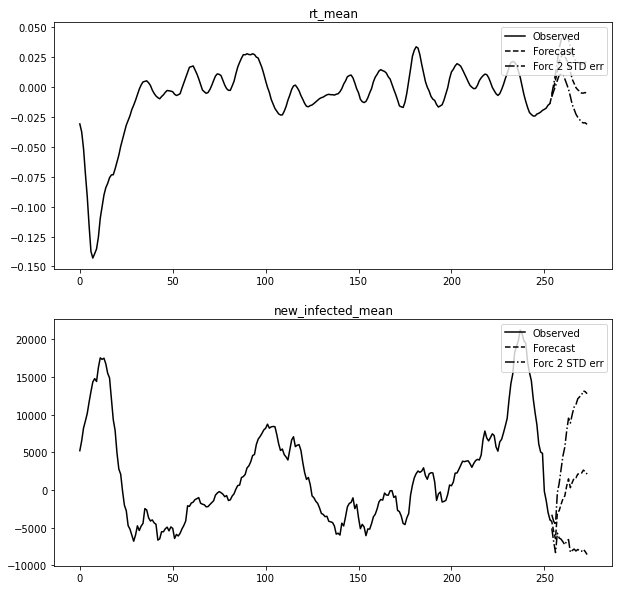

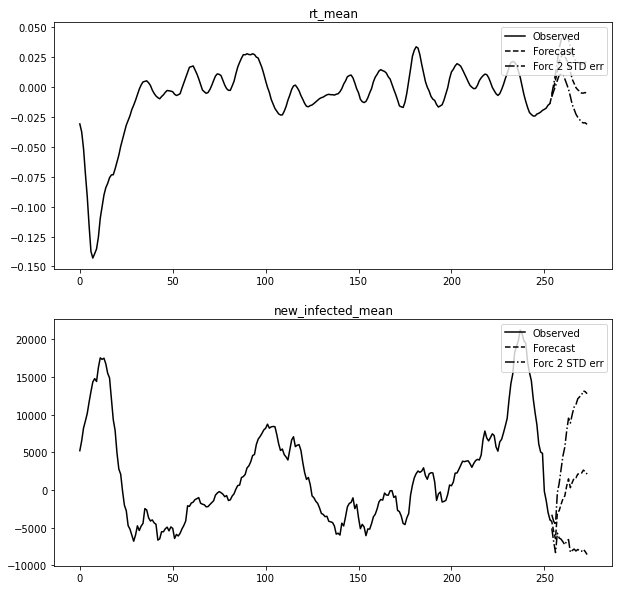

In [218]:
results.plot_forecast(20)

In [219]:
fevd = results.fevd(5)
fevd.summary()

FEVD for rt_mean
      rt_mean  new_infected_mean
0    1.000000           0.000000
1    0.981315           0.018685
2    0.979819           0.020181
3    0.972008           0.027992
4    0.980749           0.019251

FEVD for new_infected_mean
      rt_mean  new_infected_mean
0    0.012454           0.987546
1    0.027499           0.972501
2    0.067167           0.932833
3    0.247745           0.752255
4    0.329577           0.670423




In [220]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=data.columns + '_1d')
df_forecast.tail()


/Users/mikecave/anaconda3/envs/working/lib/python3.8/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,rt_mean_1d,new_infected_mean_1d
15489,-0.007396,-4208.088425
15490,-0.000985,-5503.892341
15491,0.005617,-6484.312144
15492,0.013192,-3055.590652


In [221]:
# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc
# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
#df_results.loc[:, ['realgdp_forecast', 'realcons_forecast']]

In [222]:
df_results

,rt_mean_1d,new_infected_mean_1d,rt_mean_forecast,new_infected_mean_forecast
15489,-0.021515,-8154.088425,0.977386,547332.911575
15490,-0.022500,-13657.980766,0.954886,533674.930809
15491,-0.016883,-20142.292910,0.938003,513532.637899
15492,-0.003691,-23197.883562,0.934312,490334.754337
